In [1]:
import pandas as pd
import numpy as np

In [ ]:
# 07. 서류 전형 합격 여부
df = pd.read_csv('data/toeic.csv')

# 코드를 작성하세요.
pass_total = df['LC'] + df['RC'] > 600
pass_both = (df['LC'] >= 250) & ( df['RC'] >= 250)

# 정답 출력
df['합격 여부'] = pass_total & pass_both
df

In [ ]:
# 08. 퍼즐을 풀어라
import pandas as pd

df = pd.read_csv('https://github.com/codeit-courses/data-science/raw/master/Puzzle_before.csv')

df['A'] = df['A']*2
df[df.loc[:, 'B':'E']<80] = 0
df[df.loc[:, 'B':'E']>=80] = 1
df.iloc[2, 5] = 99
# 정답 출력
df

In [2]:
# 여행지 선정하기
wc_df = pd.read_csv('data/world_cities.csv')
wc_df

,Unnamed: 0,City / Urban area,Country,Population,Land area (in sqKm)
0,0,Buenos Aires,Argentina,11200000,2266
1,1,Melbourne,Australia,3162000,2080
2,2,Sydney,Australia,3502000,1687
3,3,Brisbane,Australia,1508000,1603
4,4,Perth,Australia,1177000,964
...,...,...,...,...,...
244,245,Canton,USA,267000,372
245,246,Spokane,USA,335000,371
246,247,Tashkent,Uzbekistan,2200000,531
247,248,Ho Chi Minh City,Vietnam,4900000,518


In [5]:
wc_df['Country'].value_counts()
# wc_df['City / Urban area'].value_counts().shape

USA        105
France      15
Brazil      10
Canada       9
Germany      8
          ... 
Lebanon      1
Ecuador      1
Sudan        1
Denmark      1
Kuwait       1
Name: Country, Length: 61, dtype: int64

In [6]:
wc_df['Country']

0       Argentina
1       Australia
2       Australia
3       Australia
4       Australia
          ...    
244           USA
245           USA
246    Uzbekistan
247       Vietnam
248      Zimbabwe
Name: Country, Length: 249, dtype: object

In [10]:
wc_df['City / Urban area'].value_counts().shape

(249,)

In [15]:
(wc_df['Population']/wc_df['Land area (in sqKm)'] > 10000).value_counts()

False    230
True      19
dtype: int64

In [16]:
# 다른 풀이
wc_df['Density'] = wc_df['Population']/wc_df['Land area (in sqKm)']
df_high_density = wc_df[wc_df['Density'] > 10000]

In [17]:
df_high_density.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19 entries, 32 to 129
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           19 non-null     int64  
 1   City / Urban area    19 non-null     object 
 2   Country              19 non-null     object 
 3   Population           19 non-null     int64  
 4   Land area (in sqKm)  19 non-null     int64  
 5   Density              19 non-null     float64
dtypes: float64(1), int64(3), object(2)
memory usage: 1.0+ KB


In [19]:
wc_df.sort_values(by='Density', ascending=False)

,Unnamed: 0,City / Urban area,Country,Population,Land area (in sqKm),Density
75,75,Mumbai,India,14350000,484,29648.760331
74,74,Kolkata,India,12700000,531,23917.137476
101,101,Karachi,Pakistan,9800000,518,18918.918919
99,99,Lagos,Nigeria,13400000,738,18157.181572
34,34,Shenzhen,China,8000000,466,17167.381974
...,...,...,...,...,...,...
194,195,Chattanooga,USA,344000,751,458.055925
223,224,Asheville,USA,222000,536,414.179104
57,57,Pau,France,181000,450,402.222222
220,221,Hickory,USA,188000,546,344.322344


In [30]:
grouped = wc_df['City / Urban area'].groupby(wc_df['Country']).size()

In [33]:
grouped[:50]

Country
Argentina        1
Australia        6
Austria          1
Azerbaijan       1
Belgium          2
Brazil          10
Cambodia         1
Canada           9
Chile            1
China            6
Colombia         1
Congo            2
Denmark          1
Ecuador          1
Egypt            1
Finland          1
France          15
Germany          8
Ghana            1
Greece           1
Hungary          1
India            6
Indonesia        1
Iran             1
Iraq             1
Ireland          1
Israel           1
Italy            4
Japan            5
Kuwait           1
Lebanon          1
Malaysia         1
Mexico           3
Netherlands      1
New Zealand      1
Nigeria          1
Pakistan         2
Peru             1
Philippines      1
Poland           2
Portugal         2
Puerto Rico      2
Russia           3
Saudi            1
Saudi Arabia     2
Singapore        1
South Africa     6
South Korea      1
Spain            2
Sudan            1
Name: City / Urban area, dtype: int64

In [ ]:
# 다른 방법

world_cities = pd.read_csv("data/world_cities.csv")
world_cities['Country']

countries = world_cities['Country'].value_counts()
countries[countries == 4]

In [ ]:
#  05. 코드잇 대학교: 수강신청 준비
df = pd.read_csv('data/enrolment_1.csv')
df["status"] = "allowed"

# 조건 1
boolean1 = df["course name"] == "information technology"
boolean2 = df["year"] == 1
df.loc[boolean1 & boolean2, "status"] = "not allowed"

# 조건 2
boolean3= df["course name"] == "commerce"
boolean4= df["year"] == 4
df.loc[boolean3& boolean4, "status"] = "not allowed"

# 조건 3
allowed = df["status"] == "allowed"
course_counts = df.loc[allowed, "course name"].value_counts()
closed_courses = list(course_counts[course_counts < 5].index)
for course in closed_courses:
    df.loc[df["course name"] == course, "status"] = "not allowed"

# 정답 확인
df

In [ ]:
# 06. 코드잇 대학교: 강의실 배정하기 1
import pandas as pd
import numpy as np

df = pd.read_csv('data/enrolment_2.csv')

# 코드를 작성하세요.
course_counts = df["course name"].value_counts()
auditorium_list = list(course_counts[course_counts >= 80].index)
large_list = list(course_counts[(course_counts < 80) & (course_counts >= 40)].index)
medium_list = list(course_counts[(course_counts < 40) & (course_counts >= 15)].index)
small_list = list(course_counts[(course_counts < 15) & (course_counts >= 5)].index)

notassigned_series = df['status'] == 'not allowed'
auditorium_series = df['course name'].isin(auditorium_list)
large_series = df['course name'].isin(large_list)
medium_series = df['course name'].isin(medium_list)

df['room assignment'] = np.where(notassigned_series, 'not assigned', np.where(auditorium_series, 'Auditorium', np.where(large_series, 'Large room', np.where(medium_series, "Medium room", "Small room"))))
#정답 출력
df

In [ ]:
# 06. 코드잇 대학교: 강의실 배정하기 2
import pandas as pd

df = pd.read_csv('data/enrolment_3.csv')

# 중복값을 뺀 이름을 오름차순으로 정렬하여 Array형태로 저장
Autiorium_list = df[df['room assignment'] == 'Auditorium']
unique_name_1 = sorted(Autiorium_list['course name'].unique())
Large_list = df[df['room assignment'] == 'Large room']
unique_name_2 = sorted(Large_list['course name'].unique())
Medium_list = df[df['room assignment'] == 'Medium room']
unique_name_3 = sorted(Medium_list['course name'].unique())
Small_list = df[df['room assignment'] == 'Small room']
unique_name_4 = sorted(Small_list['course name'].unique())

# 각 Array 요소와 동일한 series의 room assignment 값을 변경
for name in unique_name_1:
    df.loc[df['course name'] == name, 'room assignment'] = 'Auditorium-'+str(unique_name_1.index(name)+1)
for name in unique_name_2:
    df.loc[df['course name'] == name, 'room assignment'] = 'Large-'+str(unique_name_2.index(name)+1)
for name in unique_name_3:
    df.loc[df['course name'] == name, 'room assignment'] = 'Medium-'+str(unique_name_3.index(name)+1)
for name in unique_name_4:
    df.loc[df['course name'] == name, 'room assignment'] = 'Small-'+str(unique_name_4.index(name)+1)

#컬럼명 변경
df.rename(columns = {"room assignment":"room number"}, inplace=True)

# 조건 3
df.loc[df['status'] == 'not allowed'] = 'not assigned'
# 정답 출력
df

In [ ]:
# 03. 국가별 경제 성장
%matplotlib inline
import pandas as pd

df = pd.read_csv('data/gdp.csv', index_col=0)
# 나라명 모두 출력
# print(sorted(list(df.columns)))

df.plot(y=['Korea_Rep','United_States','United_Kingdom','Germany','China', 'Japan'])

In [ ]:
# 06. 실리콘 밸리에는 누가 일할까
%matplotlib inline
import pandas as pd

df = pd.read_csv('data/silicon_valley_summary.csv')

managers_data = (df.loc[(df['job_category'] == 'Managers') & (df['gender'] == 'Male'), 'job_category':'count'])
managers_data.drop(managers_data.index[-1], inplace=True)

grouped_data = managers_data.groupby(by='race_ethnicity', sort=False, as_index=False).sum()
grouped_data.plot(kind='bar', x='race_ethnicity', y='count')

In [ ]:
# 08. 실리콘 밸리에는 누가 일할까 2
%matplotlib inline
import pandas as pd

df = pd.read_csv('data/silicon_valley_details.csv')

Adobe_data = df.loc[df['company'] == 'Adobe']
drop_index = Adobe_data[Adobe_data['count']==0].index
Adobe_data.drop(drop_index, inplace=True)   #count가 0인 값 제거
del Adobe_data['year'] #year 컬럼 제거

grouped_Adobe_data = Adobe_data.groupby(by='job_category', sort=False, as_index=False).sum()
grouped_Adobe_data.drop([grouped_Adobe_data.index[-1], grouped_Adobe_data.index[-2]], inplace=True) # totals, previous_totals 제거
categories = grouped_Adobe_data['job_category']
grouped_Adobe_data.plot(kind='pie', x='job_category', y='count', labels=categories)

# 모범 정답
boolean_adobe = df['company'] == 'Adobe'
boolean_all_races = df['race'] == 'Overall_totals'
boolean_count = df['count'] != 0
boolean_job_category = (df['job_category'] != 'Totals') & (df['job_category'] != 'Previous_totals')

df_adobe = df[boolean_adobe & boolean_all_races & boolean_count & boolean_job_category]
df_adobe.set_index('job_category', inplace=True)
df_adobe.plot(kind='pie', y= 'count')

In [ ]:
# 10. 스타벅스 음료의 칼로리는? 1
%matplotlib inline
import pandas as pd

df = pd.read_csv('data/starbucks_drinks.csv')

df.plot(kind='hist', y='Calories', bins=20)

In [2]:
# 14. 국가 지표 분석하기
%matplotlib inline
import pandas as pd
df = pd.read_csv('data/world_indexes.csv')
df

,Id,Human Development Index HDI-2014,Gini coefficient 2005-2013,Adolescent birth rate 15-19 per 100k 20102015,Birth registration funder age 5 2005-2013,Carbon dioxide emissionsAverage annual growth,Carbon dioxide emissions per capita 2011 Tones,Change forest percentable 1900 to 2012,Change mobile usage 2009 2014,Consumer price index 2013,...,Renewable sources percentage of total 2012,Research and development expenditure 2005-2012,Secondary 2008-2014,Share of seats in parliament percentage held by womand 2014,Stock of immigrants percentage of population 2013,Taxes on income profit and capital gain 205 2013,Tertiary -2008-2014,Total tax revenue of GDP 2005-2013,Tuberculosis rate per thousands 2012,Under-five Mortality 2013 thousands
0,Norway,0.943877,26.83,7.834,100.000000,0.778925,9.192879,11.914567,5.22,104.194175,...,47.752676,1.654740,111.061300,39.644970,13.772622,31.798391,74.10112,27.288097,0.14,2.8
1,Australia,0.934958,34.01,12.059,100.000000,1.090351,16.519210,-4.561812,30.27,107.789440,...,4.632202,2.385620,135.535430,30.530973,27.711793,65.333748,86.33409,21.361426,0.19,4.0
2,Switzerland,0.929613,32.35,1.900,100.000000,-1.101254,4.625230,8.567416,16.72,99.317229,...,49.659398,2.870460,96.306380,28.455285,28.906998,22.673299,55.56190,9.759124,0.22,4.2
3,Denmark,0.923328,26.88,5.101,100.000000,-1.767733,7.248329,23.029974,1.83,106.057718,...,26.767245,2.984160,124.659270,37.988827,9.909512,39.677938,79.59763,33.395651,0.40,3.5
4,Netherlands,0.921794,28.87,6.165,100.000000,-0.252734,10.064490,5.922602,-4.31,107.474154,...,6.671366,2.156760,129.912770,36.888889,11.724418,23.533104,77.34356,19.724059,0.17,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
183,Burundi,0.399928,33.27,30.256,75.000000,0.630172,0.021909,-41.730104,195.33,140.018625,...,53.544693,0.121260,33.102310,34.931507,2.504071,19.855360,3.16599,11.006974,18.00,82.9
184,Chad,0.391906,43.30,152.015,16.000000,0.861268,0.044623,-13.298246,98.14,109.954331,...,88.289148,0.612717,22.794100,14.893617,3.423823,27.618325,2.25039,15.978897,18.00,147.5
185,Eritrea,0.390899,36.75,65.280,99.333333,2.709607,0.087768,-6.033313,151.49,113.652667,...,78.271531,0.226783,42.522027,22.000000,0.249450,17.402965,2.04323,13.265781,4.60,49.9
186,Central African Republic,0.350131,56.30,98.334,61.000000,-1.829932,0.064475,-2.835840,54.91,108.757088,...,80.467360,0.253410,17.791890,12.500000,2.907818,6.902223,2.84086,9.455153,50.00,139.2


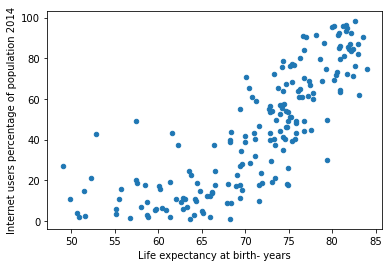

In [3]:
# 기대수명 - 인터넷 사용자 비율
df.plot(kind='scatter', x='Life expectancy at birth- years', y='Internet users percentage of population 2014')

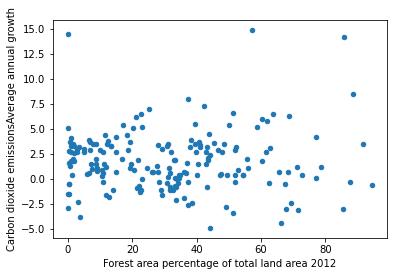

In [4]:
# 숲 면적 비율 - 탄소 배출 증가율
df.plot(kind='scatter', x='Forest area percentage of total land area 2012', y='Carbon dioxide emissionsAverage annual growth')

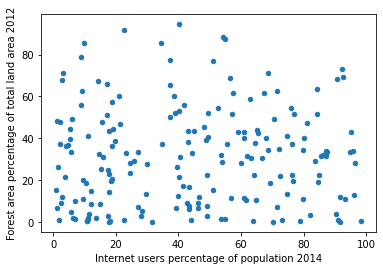

In [5]:
# 인터넷 사용자 비율 - 숲 면적 비율
df.plot(kind='scatter', x='Internet users percentage of population 2014', y= 'Forest area percentage of total land area 2012')

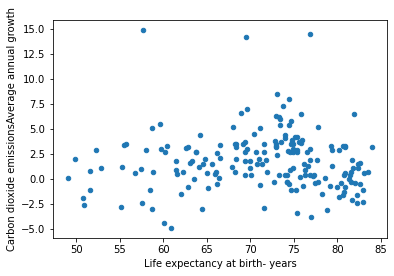

In [6]:
# 기대 수명 - 탄소 배출 증가율
df.plot(kind='scatter', x='Life expectancy at birth- years', y='Carbon dioxide emissionsAverage annual growth')

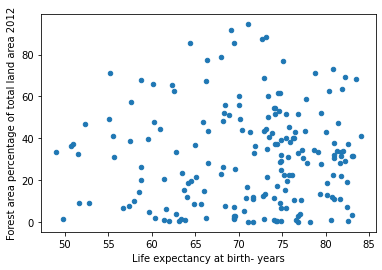

In [7]:
# 기대 수명 - 숲 면적 비율
df.plot(kind='scatter', x='Life expectancy at birth- years', y='Forest area percentage of total land area 2012')

In [3]:
# (03) 요즘 인기 직업은?
import pandas as pd
import seaborn as sns
df = pd.read_csv('data/occupations.csv')
df

,user_id,age,gender,occupation,zip_code
0,1,24,M,technician,85711
1,2,53,F,other,94043
2,3,23,M,writer,32067
3,4,24,M,technician,43537
4,5,33,F,other,15213
...,...,...,...,...,...
938,939,26,F,student,33319
939,940,32,M,administrator,02215
940,941,20,M,student,97229
941,942,48,F,librarian,78209


In [26]:
df = pd.read_csv('data/young_survey.csv')
df.head()

,Music,Slow songs or fast songs,Dance,Folk,Country,Classical music,Musical,Pop,Rock,Metal or Hardrock,...,Spending on looks,Spending on gadgets,Spending on healthy eating,Age,Height,Weight,Number of siblings,Gender,Handedness,Education
0,5.0,3.0,2.0,1.0,2.0,2.0,1.0,5.0,5.0,1.0,...,3.0,1,3.0,20.0,163.0,48.0,1.0,female,right,bachelor's degree
1,4.0,4.0,2.0,1.0,1.0,1.0,2.0,3.0,5.0,4.0,...,2.0,5,2.0,19.0,163.0,58.0,2.0,female,right,bachelor's degree
2,5.0,5.0,2.0,2.0,3.0,4.0,5.0,3.0,5.0,3.0,...,3.0,4,2.0,20.0,176.0,67.0,2.0,female,right,high school
3,5.0,3.0,2.0,1.0,1.0,1.0,1.0,2.0,2.0,1.0,...,4.0,4,1.0,22.0,172.0,59.0,1.0,female,right,bachelor's degree
4,5.0,3.0,4.0,3.0,2.0,4.0,3.0,5.0,3.0,1.0,...,3.0,2,4.0,20.0,170.0,59.0,1.0,female,right,high school


In [9]:
female_info['occupation'].value_counts()

student          60
administrator    36
other            36
librarian        29
educator         26
writer           19
artist           13
healthcare       11
marketing        10
homemaker         6
programmer        6
none              4
scientist         3
salesman          3
executive         3
entertainment     2
lawyer            2
engineer          2
retired           1
technician        1
Name: occupation, dtype: int64

In [10]:
male_info = df.loc[df.iloc[:, 2] == 'M']
male_info

,user_id,age,gender,occupation,zip_code
0,1,24,M,technician,85711
2,3,23,M,writer,32067
3,4,24,M,technician,43537
5,6,42,M,executive,98101
6,7,57,M,administrator,91344
...,...,...,...,...,...
935,936,24,M,other,32789
936,937,48,M,educator,98072
939,940,32,M,administrator,02215
940,941,20,M,student,97229


In [11]:
male_info['occupation'].value_counts()

student          136
other             69
educator          69
engineer          65
programmer        60
administrator     43
executive         29
scientist         28
writer            26
technician        26
librarian         22
marketing         16
entertainment     16
artist            15
retired           13
lawyer            10
salesman           9
doctor             7
healthcare         5
none               5
homemaker          1
Name: occupation, dtype: int64

In [31]:
# 05. 브런치 카페 음악 셀렉션
music = pd.read_csv('data/young_survey.csv')
music

,Music,Slow songs or fast songs,Dance,Folk,Country,Classical music,Musical,Pop,Rock,Metal or Hardrock,...,Spending on looks,Spending on gadgets,Spending on healthy eating,Age,Height,Weight,Number of siblings,Gender,Handedness,Education
0,5.0,3.0,2.0,1.0,2.0,2.0,1.0,5.0,5.0,1.0,...,3.0,1,3.0,20.0,163.0,48.0,1.0,female,right,bachelor's degree
1,4.0,4.0,2.0,1.0,1.0,1.0,2.0,3.0,5.0,4.0,...,2.0,5,2.0,19.0,163.0,58.0,2.0,female,right,bachelor's degree
2,5.0,5.0,2.0,2.0,3.0,4.0,5.0,3.0,5.0,3.0,...,3.0,4,2.0,20.0,176.0,67.0,2.0,female,right,high school
3,5.0,3.0,2.0,1.0,1.0,1.0,1.0,2.0,2.0,1.0,...,4.0,4,1.0,22.0,172.0,59.0,1.0,female,right,bachelor's degree
4,5.0,3.0,4.0,3.0,2.0,4.0,3.0,5.0,3.0,1.0,...,3.0,2,4.0,20.0,170.0,59.0,1.0,female,right,high school
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
992,5.0,2.0,5.0,2.0,2.0,5.0,4.0,4.0,4.0,3.0,...,4.0,3,4.0,20.0,164.0,57.0,1.0,female,right,high school
993,4.0,4.0,5.0,1.0,3.0,4.0,1.0,4.0,1.0,1.0,...,1.0,5,3.0,27.0,183.0,80.0,5.0,male,left,master's degree
994,4.0,3.0,1.0,1.0,2.0,2.0,2.0,3.0,4.0,1.0,...,2.0,2,5.0,18.0,173.0,75.0,0.0,female,right,high school
995,5.0,3.0,3.0,3.0,1.0,3.0,1.0,3.0,4.0,1.0,...,3.0,3,3.0,25.0,173.0,58.0,1.0,female,right,bachelor's degree


In [42]:
brunch_df = music.corr()['Getting up']

In [44]:
brunch_df[1:19].sort_values(ascending=False)

Rock                        0.105245
Pop                         0.079101
Hiphop, Rap                 0.038980
Rock n roll                 0.028889
Alternative                 0.027540
Dance                       0.027249
Techno, Trance              0.019863
Swing, Jazz                 0.019556
Classical music             0.014285
Musical                     0.011869
Reggae, Ska                -0.008434
Latino                     -0.015060
Country                    -0.025315
Metal or Hardrock          -0.026769
Punk                       -0.029189
Folk                       -0.049612
Slow songs or fast songs   -0.052613
Opera                      -0.071819
Name: Getting up, dtype: float64

In [46]:
# 06. 스타트업 아이템 탐색하기
df = pd.read_csv('data/young_survey.csv')
df

,Music,Slow songs or fast songs,Dance,Folk,Country,Classical music,Musical,Pop,Rock,Metal or Hardrock,...,Spending on looks,Spending on gadgets,Spending on healthy eating,Age,Height,Weight,Number of siblings,Gender,Handedness,Education
0,5.0,3.0,2.0,1.0,2.0,2.0,1.0,5.0,5.0,1.0,...,3.0,1,3.0,20.0,163.0,48.0,1.0,female,right,bachelor's degree
1,4.0,4.0,2.0,1.0,1.0,1.0,2.0,3.0,5.0,4.0,...,2.0,5,2.0,19.0,163.0,58.0,2.0,female,right,bachelor's degree
2,5.0,5.0,2.0,2.0,3.0,4.0,5.0,3.0,5.0,3.0,...,3.0,4,2.0,20.0,176.0,67.0,2.0,female,right,high school
3,5.0,3.0,2.0,1.0,1.0,1.0,1.0,2.0,2.0,1.0,...,4.0,4,1.0,22.0,172.0,59.0,1.0,female,right,bachelor's degree
4,5.0,3.0,4.0,3.0,2.0,4.0,3.0,5.0,3.0,1.0,...,3.0,2,4.0,20.0,170.0,59.0,1.0,female,right,high school
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
992,5.0,2.0,5.0,2.0,2.0,5.0,4.0,4.0,4.0,3.0,...,4.0,3,4.0,20.0,164.0,57.0,1.0,female,right,high school
993,4.0,4.0,5.0,1.0,3.0,4.0,1.0,4.0,1.0,1.0,...,1.0,5,3.0,27.0,183.0,80.0,5.0,male,left,master's degree
994,4.0,3.0,1.0,1.0,2.0,2.0,2.0,3.0,4.0,1.0,...,2.0,2,5.0,18.0,173.0,75.0,0.0,female,right,high school
995,5.0,3.0,3.0,3.0,1.0,3.0,1.0,3.0,4.0,1.0,...,3.0,3,3.0,25.0,173.0,58.0,1.0,female,right,bachelor's degree


In [52]:
music_df = df.corr()['Musical instruments']
look_df = df.corr()['Spending on looks']
note_df = df.corr()['Writing notes']
work_df = df.corr()['Workaholism']

In [56]:
music_df.sort_values(ascending=False)
# df.corr().loc['Musical instruments', 'Writing']

Musical instruments    1.000000
Writing                0.343816
Classical music        0.321830
Art exhibitions        0.296688
Folk                   0.267732
                         ...   
Economy Management    -0.088502
Cheating in school    -0.099819
Hiphop, Rap           -0.114312
Public speaking       -0.122962
Pop                   -0.129533
Name: Musical instruments, Length: 139, dtype: float64

In [57]:
look_df.sort_values(ascending=False)

Spending on looks         1.000000
Shopping                  0.511252
Shopping centres          0.487734
Branded clothing          0.418399
Entertainment spending    0.403315
                            ...   
Mathematics              -0.127289
Sci-fi                   -0.129536
Physics                  -0.139638
Metal or Hardrock        -0.182830
Finances                 -0.204038
Name: Spending on looks, Length: 139, dtype: float64

In [58]:
note_df.sort_values(ascending=False)

Writing notes            1.000000
Workaholism              0.409415
Prioritising workload    0.368805
Thinking ahead           0.251044
Romantic                 0.203944
                           ...   
Action                  -0.109336
War                     -0.140720
Small - big dogs        -0.153692
Weight                  -0.171496
Height                  -0.189153
Name: Writing notes, Length: 139, dtype: float64

In [59]:
work_df.sort_values(ascending=False)

Workaholism               1.000000
Prioritising workload     0.416831
Writing notes             0.409415
Thinking ahead            0.290709
Healthy eating            0.238644
                            ...   
Celebrities              -0.101977
Entertainment spending   -0.102174
Changing the past        -0.114141
Getting up               -0.163420
Cheating in school       -0.246634
Name: Workaholism, Length: 139, dtype: float64

In [69]:
# 08. 영화 카페 운영하기
movie = df.loc[:, 'Horror':'Action']
movie_corr = movie.corr()
movie_corr

,Horror,Thriller,Comedy,Romantic,Sci-fi,War,Fantasy/Fairy tales,Animated,Documentary,Western,Action
Horror,1.000000,0.503069,0.098243,-0.128117,0.165834,0.136508,-0.087150,0.004865,-0.063749,0.078845,0.129958
Thriller,0.503069,1.000000,-0.008975,-0.164751,0.230838,0.220754,-0.090075,-0.025239,0.046558,0.124719,0.278214
Comedy,0.098243,-0.008975,1.000000,0.286236,0.040425,-0.077274,0.211025,0.180246,-0.007444,-0.033091,0.121256
Romantic,-0.128117,-0.164751,0.286236,1.000000,-0.097219,-0.193751,0.349432,0.239951,-0.083895,-0.126574,-0.181823
Sci-fi,0.165834,0.230838,0.040425,-0.097219,1.000000,0.274634,-0.009158,0.068642,0.141714,0.276898,0.363429
War,0.136508,0.220754,-0.077274,-0.193751,0.274634,1.000000,-0.072474,-0.026996,0.235355,0.396669,0.299257
Fantasy/Fairy tales,-0.087150,-0.090075,0.211025,0.349432,-0.009158,-0.072474,1.000000,0.679270,0.140227,-0.023267,-0.051591
Animated,0.004865,-0.025239,0.180246,0.239951,0.068642,-0.026996,0.679270,1.000000,0.148375,-0.003069,0.019379
Documentary,-0.063749,0.046558,-0.007444,-0.083895,0.141714,0.235355,0.140227,0.148375,1.000000,0.263859,0.131062
Western,0.078845,0.124719,-0.033091,-0.126574,0.276898,0.396669,-0.023267,-0.003069,0.263859,1.000000,0.320005


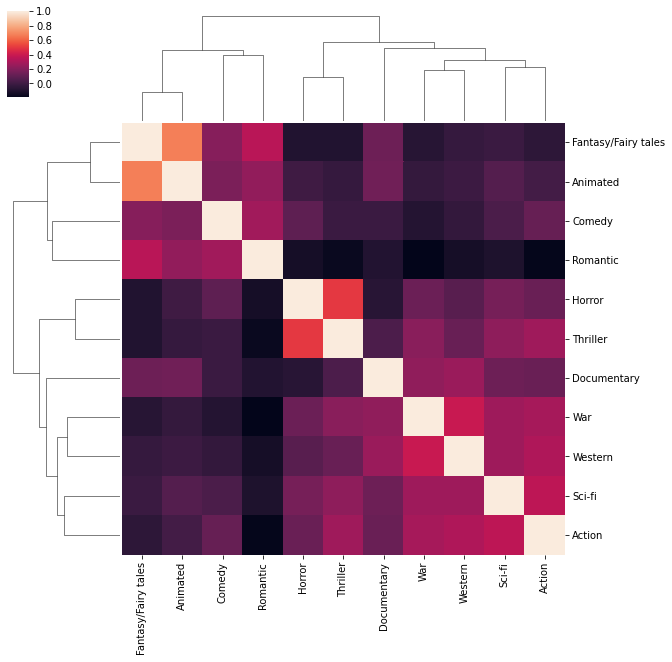

In [71]:
sns.clustermap(movie_corr)

In [72]:
# 10. 타이타닉 EDA
titanic_df = pd.read_csv('data/titanic.csv')
titanic_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


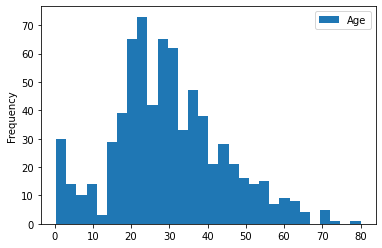

In [109]:
# 가장 많은 나이대 확인 (히스토그램으로, 빈도수 확인)
# sns.violinplot(data=titanic_df, y='Age')
titanic_df.plot(kind='hist', y='Age', bins=30)

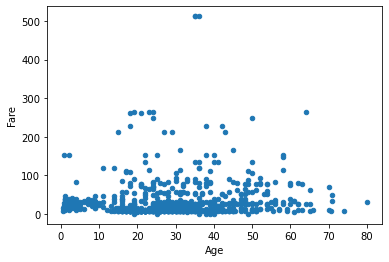

In [87]:
# 가장 많은 요금을 낸 사람의 나이대 확인
titanic_df.plot(kind='scatter', x='Age', y='Fare')

In [88]:
# 사망자, 생존자 수 비교
titanic_df['Survived'].value_counts() # 0: 사망, 1: 생존

0    549
1    342
Name: Survived, dtype: int64

In [89]:
# 좌석등급 탑승 수 비교
titanic_df['Pclass'].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

In [100]:
# 나이와 생존률 간 상관관계
titanic_df.corr().loc['Survived', 'Age']

-0.07722109457217737

In [105]:
# 객실별 생존률 비교
titanic_df.groupby(titanic_df['Pclass']).mean()

,PassengerId,Survived,Age,SibSp,Parch,Fare
Pclass,,,,,,
1,461.597222,0.629630,38.233441,0.416667,0.356481,84.154687
2,445.956522,0.472826,29.877630,0.402174,0.380435,20.662183
3,439.154786,0.242363,25.140620,0.615071,0.393075,13.675550


In [107]:
titanic_df.groupby(titanic_df['Survived']).mean()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
Survived,,,,,,
0,447.016393,2.531876,30.626179,0.553734,0.329690,22.117887
1,444.368421,1.950292,28.343690,0.473684,0.464912,48.395408


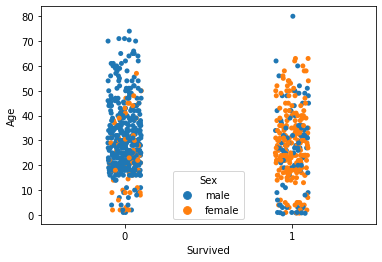

In [110]:
# 생존여부에 따른 나이/성별 분포
sns.stripplot(data=titanic_df, x="Survived", y="Age", hue="Sex")

In [ ]:
# 03. 박물관이 살아있다
import pandas as pd
import numpy as np
df = pd.read_csv('data/museum_1.csv')

df['분류'] = df['시설명'].str.contains('대학')
df['분류'] = np.where(df['분류'], '대학', '일반')
df

In [ ]:
# 03. 박물관이 살아있다 2
import pandas as pd

df = pd.read_csv('data/museum_2.csv')

local_phone_num = df['운영기관전화번호'].str.split('-', n=1, expand=True)
df['지역번호'] = local_phone_num[0]

df

In [ ]:
# 07. 박물관이 살아있다 3
import pandas as pd

df = pd.read_csv("data/museum_3.csv", dtype={'지역번호': str})

categories = {
    '02' : '서울시',
    '031' : '경기도',
    '032' : '경기도',
    '033' : '강원도',
    '041' : '충청도',
    '042' : '충청도',
    '043' : '충청도',
    '044' : '충청도',
    '051' : '부산시',
    '052' : '경상도',
    '053' : '경상도',
    '054' : '경상도',
    '055' : '경상도',
    '061' : '전라도',
    '062' : '전라도',
    '063' : '전라도',
    '064' : '제주도',
    '1577' : '기타',
    '070' : '기타'
}

df['지역번호'] = df['지역번호'].map(categories)
df.rename(columns = {'지역번호':'지역명'}, inplace=True)
df

In [111]:
# 09. 직업 탐구하기 1
df = pd.read_csv('data/occupations.csv')
df

,user_id,age,gender,occupation,zip_code
0,1,24,M,technician,85711
1,2,53,F,other,94043
2,3,23,M,writer,32067
3,4,24,M,technician,43537
4,5,33,F,other,15213
...,...,...,...,...,...
938,939,26,F,student,33319
939,940,32,M,administrator,02215
940,941,20,M,student,97229
941,942,48,F,librarian,78209


In [113]:
occupation_groups = df.groupby('occupation')
occupation_groups.count()

,user_id,age,gender,zip_code
occupation,,,,
administrator,79,79,79,79
artist,28,28,28,28
doctor,7,7,7,7
educator,95,95,95,95
engineer,67,67,67,67
entertainment,18,18,18,18
executive,32,32,32,32
healthcare,16,16,16,16
homemaker,7,7,7,7


In [117]:
occupation_groups['age'].mean()

occupation
administrator    38.746835
artist           31.392857
doctor           43.571429
educator         42.010526
engineer         36.388060
entertainment    29.222222
executive        38.718750
healthcare       41.562500
homemaker        32.571429
lawyer           36.750000
librarian        40.000000
marketing        37.615385
none             26.555556
other            34.523810
programmer       33.121212
retired          63.071429
salesman         35.666667
scientist        35.548387
student          22.081633
technician       33.148148
writer           36.311111
Name: age, dtype: float64

In [118]:
(occupation_groups['age'].mean()).sort_values()

occupation
student          22.081633
none             26.555556
entertainment    29.222222
artist           31.392857
homemaker        32.571429
programmer       33.121212
technician       33.148148
other            34.523810
scientist        35.548387
salesman         35.666667
writer           36.311111
engineer         36.388060
lawyer           36.750000
marketing        37.615385
executive        38.718750
administrator    38.746835
librarian        40.000000
healthcare       41.562500
educator         42.010526
doctor           43.571429
retired          63.071429
Name: age, dtype: float64

In [190]:
# 10. 직업 탐구하기 2
import pandas as pd

df = pd.read_csv('data/occupations.csv')

all_counts = df.groupby('occupation').count()
all_counts['gender'] # 남녀 총계

df.loc[df['gender'] == 'M', 'gender'] = 0   #남자 
df.loc[df['gender'] == 'F', 'gender'] = 1   #여자

femal_counts = df.groupby('occupation')['gender'].sum() #여성 총계

female_per = femal_counts / all_counts['gender'] # 여성/그룹 전체
female_per.sort_values(ascending=False)

occupation
homemaker        0.857143
healthcare       0.687500
librarian        0.568627
artist           0.464286
administrator    0.455696
none             0.444444
writer           0.422222
marketing        0.384615
other            0.342857
student          0.306122
educator         0.273684
salesman         0.250000
lawyer           0.166667
entertainment    0.111111
scientist        0.096774
executive        0.093750
programmer       0.090909
retired          0.071429
technician       0.037037
engineer         0.029851
doctor           0.000000
Name: gender, dtype: float64

In [191]:
#  11. 박물관이 살아있다 (4)
import pandas as pd

museum = pd.read_csv("data/museum_3.csv", dtype={'지역번호': str})
number = pd.read_csv("data/region_number.csv", dtype={'지역번호': str})

pd.merge(museum, number, on='지역번호', how='left')

FileNotFoundError: [Errno 2] File data/museum_3.csv does not exist: 'data/museum_3.csv'

In [ ]:
# 영화 평점 분석하기 1
%matplotlib inline
import pandas as pd

df = pd.read_csv('data/movie_metadata.csv')

# df.plot(kind='box', y='budget')
q1 = df['budget'].quantile(0.25) # 25% 지점 받아오기
q3 = df['budget'].quantile(0.75) # 75% 지점 받아오기
iqr = q3 - q1  # IQR

condition = df['budget'] > q3 + 5 * iqr # 이상점 기준
df[condition].index # 이상점 index
df.drop(df[condition].index, inplace=True)

df.plot(kind='scatter', x='budget', y='imdb_score')

In [ ]:
# 영화 평점 분석하기 2
%matplotlib inline
import pandas as pd

df = pd.read_csv('data/movie_metadata.csv')

condition = df['budget'].sort_values(ascending=False).index
df.drop(condition[:15], inplace=True)

df.plot(kind='scatter', x='budget', y='imdb_score')

In [ ]:
# 09. 그녀의 전화번호를 찾아서
import requests
from bs4 import BeautifulSoup

phone_numbers = []
# 코드를 작성하세요
html_code = requests.get('https://workey.codeit.kr/orangebottle/')
soup = BeautifulSoup(html_code.text, 'html.parser')

branch_tags = soup.select('span.phoneNum')
for tags in branch_tags:
    phone_numbers.append(tags.text)

# 결과 출력
print(phone_numbers)

In [ ]:
# 10. 검색어 순위 받아오기
import requests
from bs4 import BeautifulSoup

# 코드를 작성하세요
search_ranks = []
html_code = requests.get('https://workey.codeit.kr/music/')
soup = BeautifulSoup(html_code.text, 'html.parser')

tags = soup.select('.rank__order li')

for tag in tags:
    search_ranks.append(tag.text.strip().split(' ')[2])

# 결과 출력
print(search_ranks)

In [ ]:
# TV 시청률 크롤링 2
import requests
from bs4 import BeautifulSoup

# 코드를 작성하세요.
url = 'https://workey.codeit.kr/ratings/index'
rating_pages = []
year_range = range(2010, 2019)
month_range = range(1, 13)
week = 0

for year in year_range:
    for month in month_range:
        html_code = requests.get(url + '?year={0}&month={1}&weekIndex={2}'.format(year, month, week))
        soup = BeautifulSoup(html_code.text, 'html.parser')
        select_box = soup.select('#weekSelectBox option')   #week 개수 구하기
        week_len = int(select_box[-1]['value'])
        
        while week <= week_len:
            html_code = requests.get(url + '?year={0}&month={1}&weekIndex={2}'.format(year, month, week))
            rating_pages.append(html_code.text)
            week += 1
        
        week = 0
# 테스트 코드
print(len(rating_pages)) # 가져온 총 페이지 수 
print(rating_pages[0]) # 첫 번째 페이지의 HTML 코드

In [1]:
# 14. TV 시청률 크롤링 최종 프로젝트

import time
import pandas as pd
import requests
from bs4 import BeautifulSoup

url = 'https://workey.codeit.kr/ratings/index'

records = []
year_range = range(2010, 2019)
month_range = range(1, 13)
week = 0

for year in year_range:
    for month in month_range:
        html_code = requests.get(url + '?year={0}&month={1}&weekIndex={2}'.format(year, month, week))
        soup = BeautifulSoup(html_code.text, 'html.parser')
        select_box = soup.select('#weekSelectBox option')   #week 개수 구하기
        week_len = int(select_box[-1]['value'])
        
        if week <= week_len:
            program_period = soup.select('#weekSelectBox option')
            program_ranks = soup.select('td.rank')
            program_channels = soup.select('td.channel')
            program_names = soup.select('td.program')
            program_ratings = soup.select('td.percent')

            week += 1
            time.sleep(3)
            
            # 상품의 정보를 하나의 레코드로 만들고, 리스트에 순서대로 추가하기
            for i in range(len(program_period)):
                for j in range(len(program_names)):
                    record = []
                    record.append(program_period[i].text)
                    record.append(program_ranks[j].text)
                    record.append(program_channels[j].text)
                    record.append(program_names[j].text)
                    record.append(program_ratings[j].text)
                    records.append(record)
            
        else:
            break

df = pd.DataFrame(data = records, columns = ['period', 'rank', 'channel', 'program', 'rating'])        

# 결과 출력
df.head()

SSLError: HTTPSConnectionPool(host='workey.codeit.kr', port=443): Max retries exceeded with url: /ratings/index?year=2010&month=1&weekIndex=0 (Caused by SSLError(SSLCertVerificationError(1, '[SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: self signed certificate in certificate chain (_ssl.c:1108)')))